In [1]:
import numpy as np
import matplotlib.pyplot as plt

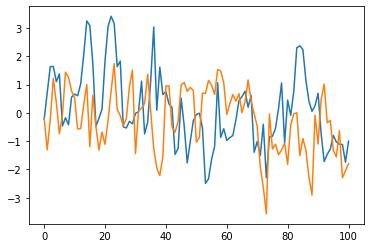

In [9]:
a = 0.8
b = 0.5
T = 101

def gen_ar1(a, T, s = 1):
    X = np.zeros(T)
    X[0] = np.random.normal(0, s / (1 - a ** 2))

    for t in range(1, T):
        X[t] = a * X[t - 1] + np.random.normal(0, s)
        
    return X

def exp_cost_ar(a_true, a_est, s = 1):
    return s + (a_true - a_est) ** 2 * 1 / (1 - a_true ** 2)

def exp_cost_model(a_true, a_est, a, s = 1):
    return s + (a_true - a_est) ** 2 * (1 / (1 - a ** 2) + a_true)
    
X_1 = gen_ar1(a, T)
X_2 = gen_ar1(b, T)

plt.plot(X_1)
plt.plot(X_2)

3.7777777777777786
2.7321851362245337


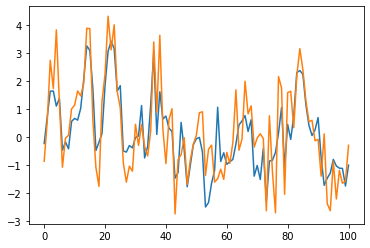

In [10]:
s = 1
Y = X_1 + np.random.normal(0, s, T)

print(1 / (1 - a ** 2) + 1)
print(np.cov(Y))
plt.plot(X_1)
plt.plot(Y)

In [16]:
## least squares estimate of the regression Y = aX_1 + bX_2
# ((X_1, X_2) (X_1, X_2)^T) ^-1 X Y
a, b, T = 0.8, 0.9, 1000
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
print(f"True a: {round(a, 2)}. True b: {round(b, 2)}. Time T: {T}.\n")

lam = 0
X_comb = np.vstack((X_1, X_2))
coefs = np.linalg.inv(X_comb @ X_comb.T + lam * np.identity(2)) @ X_comb @ Y
print(f"LS Estimates a, b:\t{np.round(coefs, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2, 4)}.")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}.")

# least squares estimate of the regression Y = aX_1
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
print(f"\nLS estimate a:\t\t{round(a_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2, 4)}.")
print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y)[0], 4)}.")

# least squares estimate of the regression Y = bX_2
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y
print(f"\nLS estimate b:\t\t{round(b_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y)[0], 4)}.")

True a: 0.8. True b: 0.9. Time T: 1000.

LS Estimates a, b:	[ 0.97 -0.01].
Emprirical risk:	1.0199.
CV using X1 and X2:	1.0238.

LS estimate a:		0.97.
Emprirical risk:	1.0202.
CV Using X1:		1.0222.

LS estimate b:		0.03.
Emprirical risk:	3.3597.
CV Using X2:		3.3667.


In [17]:
print(f"Mean Squared Error using true a: {round(1 / T * np.linalg.norm(Y - X_1 * a, 2) ** 2, 4)}.")
print(f"Mean Squared Error using true a: {round(1 / T * np.linalg.norm(Y - X_1 * a, 2) ** 2, 4)}.")

Mean Squared Error using true a: 1.0909.
Mean Squared Error using true a: 1.0909.


In [6]:
## least squares estimate of the regression Y = aX_1 + bX_2
# ((X_1, X_2) (X_1, X_2)^T) ^-1 X Y
a, b, T = 0.8, 0.9, 100
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
print(f"True a: {round(a, 2)}. True b: {round(b, 2)}. Time T: {T}.\n")

X_comb = np.vstack((X_1, X_2))
coefs = np.linalg.inv(X_comb @ X_comb.T + lam * np.identity(2)) @ X_comb @ Y
print(f"LS Estimates a, b:\t{np.round(coefs, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2, 4)}.")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}.")

# least squares estimate of the regression Y = aX_1
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
print(f"\nLS estimate a:\t\t{round(a_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2, 4)}.")
print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y), 4)}.")

# least squares estimate of the regression Y = bX_2
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y
print(f"\nLS estimate b:\t\t{round(b_est, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y), 4)}.")

# least squares estimate of the regression Y = X_1 + b X_2
Y2 = Y - X_1
b_est_2 = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y2
print(f"\nLS estimate b, a = 1:\t{round(b_est_2, 2)}.")
print(f"Emprirical risk:\t{round(1 / T * np.linalg.norm(Y2 - b_est_2 * X_2, 2) ** 2, 4)}.")
print(f"CV Using X2, a = 1:\t{round(cv_1d(X_2, Y2), 4)}.")

# using only a = 1 fixed, no model training
print(f"\nCV Using X1, a = 1:\t{round(1 / T * np.linalg.norm(Y2, 2) ** 2, 4)}.")

True a: 0.8. True b: 0.9. Time T: 100.

LS Estimates a, b:	[ 1.03 -0.03].
Emprirical risk:	1.0712.


NameError: name 'cv_nd' is not defined

In [564]:
from tqdm import tqdm

def compare_bias(a, b, T, iters = 10):
    
    diffs = []
    
    # do CV AR(2)
    for i in tqdm(range(iters)):
        X_1, X_2 = gen_ar1(a, T, np.sqrt(1)), gen_ar1(b, T, np.sqrt(1))
        Y = X_1 + np.random.normal(0, np.sqrt(sigmaY), T)
        Y2 = Y - X_1
        
        diffs.append(compute_bias(X_2, Y2))
        
    # check which one achieves lowest MSE
    return diffs

total_list = []
T = 200
a = 0
b_range = [0.0, 0.25, 0.50, 0.75, 0.99] # , 0.99]
T_range = [10, 25, 50, 75, 100, 250, 500, 1000]
sigmaY = 1
iters = 1000000

for T in T_range:
    print(f"{T}:", end = "\t")
    b_list = []
    for b in b_range:
        print(round(b, 2), end = "\t")
        b_list.append(compare_bias(a, b, T, iters = min(5000, iters // T)))
    print(np.round(b_list, 2))
    total_list.append(b_list)
    print()
    
total_list = np.array(total_list)

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 2061.78it/s]

10:	0.0	0.25	


  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

0.5	0.75	0.99	

  0%|                                                                                           | 0/80 [00:00<?, ?it/s]

[-0.17 -0.13 -0.09 -0.14 -0.1 ]

25:	0.0	0.25	0.5	

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

0.75	0.99	[-0.05 -0.05 -0.05 -0.06 -0.05]

50:	0.0	

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

0.25	0.5	0.75	

100%|█████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 361.09it/s]

0.99	[-0.02 -0.02 -0.03 -0.02 -0.02]

75:	0.0	0.25	


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

0.5	0.75	0.99	

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 328.01it/s]

[-0.01 -0.01 -0.01 -0.02 -0.02]

100:	0.0	0.25	0.5	


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

0.75	0.99	[-0.01 -0.01 -0.01 -0.01 -0.01]

250:	0.0	

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.90it/s]

0.25	0.5	


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 57.14it/s]

0.75	0.99	[-0.   -0.01  0.   -0.   -0.01]

500:	0.0	


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

0.25	0.5	0.75	

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

0.99	[-0. -0. -0. -0. -0.]

1000:	0.0	0.25	

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

0.5	0.75	0.99	

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 21.05it/s]

[-0. -0.  0. -0.  0.]



### Influence of $a$

IndexError: index 1 is out of bounds for axis 0 with size 1

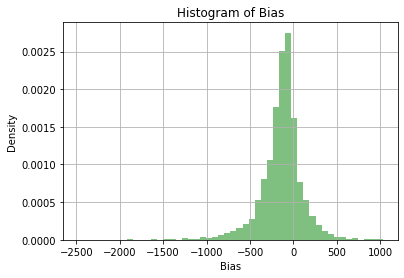

In [516]:
# the histogram of the data
n, bins, patches = plt.hist(total_list[0][0], 50, density=True, facecolor='g', alpha=0.5, label = r"$a = 0.99$")

# for b, p in zip(bins, patches):
#     if b > 0:
#         p.set_facecolor("red")

plt.xlabel('Bias')
plt.ylabel('Density')
plt.title('Histogram of Bias')
plt.grid(True)

# the histogram of the data
n, bins, patches = plt.hist(total_list[0][1], 50, density=True, facecolor='b', alpha=0.4, label = r"$a = 0.00$")

plt.xlabel('Bias')
plt.ylabel('Density')
plt.title('Histogram of Bias')
plt.grid(True)
plt.legend()
plt.show()

### Succes probability

In [510]:
print(T)
print(-1 * sigmaY / (T - 1))

200
-0.25125628140703515


In [518]:
print(np.shape(total_list))

(7, 1)


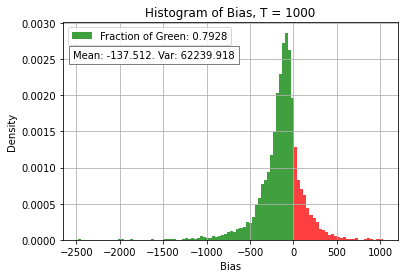

In [517]:
# the histogram of the data
lst = (np.array(total_list[0][0]))
f = plt.figure()
ax = f.add_subplot(111)

n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {sum(lst < 0) / len(lst)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")
    
plt.xlabel('Bias')
plt.ylabel('Density')
plt.title(f'Histogram of Bias, T = {T}')
t = plt.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Var: {round(lst.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.legend()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.43it/s]


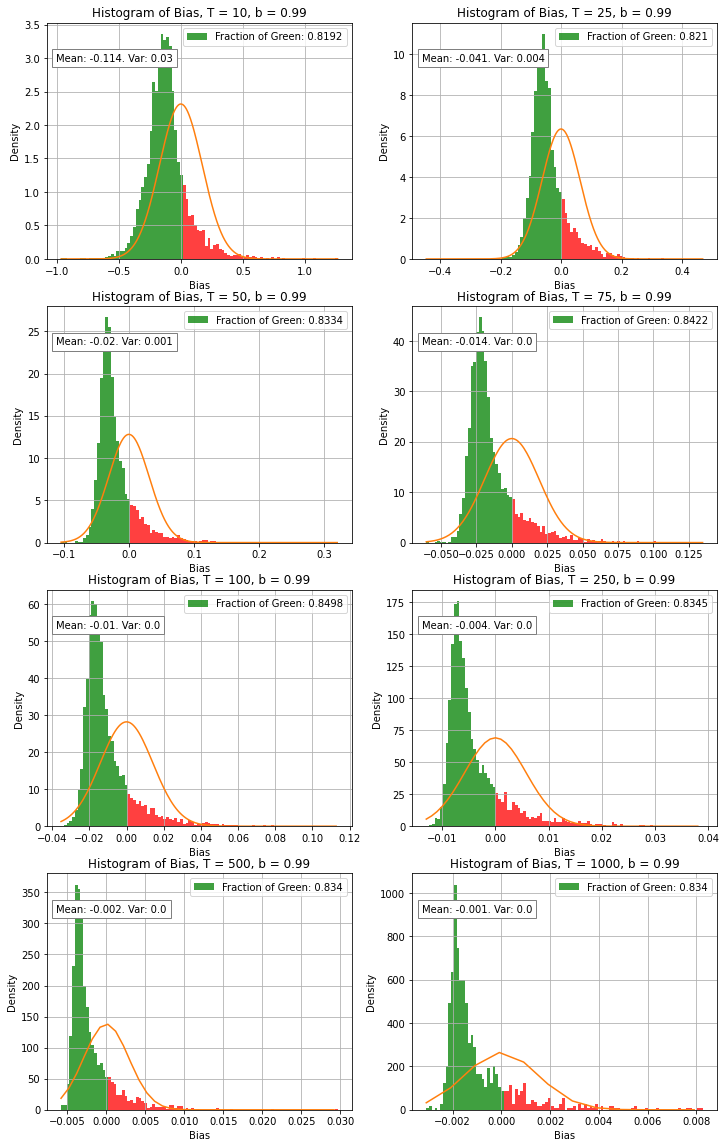

In [556]:
from scipy.stats import norm 

# the histogram of the data
f = plt.figure(figsize = (12, 20))

for i in tqdm(range(8)):
    lst = np.array(total_list[i][0])
    ax = f.add_subplot(int(f"42{i + 1}"))

    n, bins, patches = ax.hist(lst, 100, density=True, facecolor='g', alpha=0.75, label = f"Fraction of Green: {round(sum(lst < 0) / len(lst), 4)}")

    for bs, p in zip(bins, patches):
        if bs > 0:
            p.set_facecolor("red")
    
    ax.set_xlabel('Bias')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram of Bias, T = {T_range[i]}, b = {round(b, 2)}')
    t = ax.text(0.03, 0.85, f'Mean: {round(lst.mean(), 3)}. Var: {round(lst.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
    t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
    ax.grid(True)
    
    # Plot between -10 and 10 with .001 steps.
    x_axis = np.arange(min(bins), max(bins), 0.001)
    # Mean = 0, SD = 2.
    ax.plot(x_axis, norm.pdf(x_axis , 0, lst.std()))

    ax.legend()

In [570]:
def compare_cvs2(a, b, T, iters = 10):
    
    count = 0
    
    # do CV AR(2)
    for i in range(iters):
        X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
        Y = X_1 + np.random.normal(0, 1, T)
        Y2 = Y - X_1
        
        cv_ar2 = cv_1d(X_2, Y2)[0]
        cv_ar1 = 1 / T * np.linalg.norm(Y2, 2) ** 2
        
        count += cv_ar1 < cv_ar2
        
    # check which one achieves lowest MSE
    return count / iters

total_list = []
a = 0
b_range = [0.0, 0.25, 0.50, 0.75, 0.99]
T_range = [10, 25, 50, 75, 100, 250, 500, 1000]
iters = 10000

for T in T_range:
    print(f"{T}:", end = "\t")
    b_list = []
    for b in b_range:
        print(round(b, 2), end = "\t")
        b_list.append(compare_cvs2(a, b, T, iters = iters // T))
    print(np.round(b_list, 2))
    total_list.append(b_list)
    print()
    
total_list = np.array(total_list)
print(total_list)

10:	0.0	0.25	0.5	0.75	0.99	[0.8  0.8  0.77 0.81 0.81]

25:	0.0	0.25	0.5	0.75	0.99	[0.81 0.84 0.85 0.86 0.81]

50:	0.0	0.25	0.5	0.75	0.99	[0.86 0.86 0.85 0.82 0.86]

75:	0.0	0.25	0.5	0.75	0.99	[0.82 0.86 0.77 0.92 0.83]

100:	0.0	0.25	0.5	0.75	0.99	[0.89 0.85 0.82 0.85 0.84]

250:	0.0	0.25	0.5	0.75	0.99	[0.82 0.85 0.8  0.82 0.8 ]

500:	0.0	0.25	0.5	0.75	0.99	[0.85 0.8  0.8  0.85 0.85]

1000:	0.0	0.25	0.5	0.75	0.99	[0.9 0.9 0.8 0.8 0.8]

[[0.798      0.797      0.772      0.811      0.814     ]
 [0.8125     0.845      0.8475     0.8625     0.8075    ]
 [0.86       0.86       0.85       0.815      0.865     ]
 [0.81954887 0.85714286 0.76691729 0.92481203 0.83458647]
 [0.89       0.85       0.82       0.85       0.84      ]
 [0.825      0.85       0.8        0.825      0.8       ]
 [0.85       0.8        0.8        0.85       0.85      ]
 [0.9        0.9        0.8        0.8        0.8       ]]


In [573]:
def compare_cvs(a, b, T, iters = 10):
    
    count = 0
    
    # do CV AR(2)
    for i in range(iters):
        X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
        Y = X_1 + np.random.normal(0, 1, T)
        
        cv_ar2 = cv_nd(np.vstack((X_1, X_2)), Y)
        cv_ar1 = cv_1d(X_1, Y)[0]
        
        count += cv_ar1 < cv_ar2
        
    # check which one achieves lowest MSE
    return count / iters

total_list = []
a = 0.0
b_range = np.linspace(0.00, 0.99, 5)
T_range = [10, 20, 50, 100, 250]
iters = 1000000

for T in T_range:
    print(f"{T}:", end = "\t")
    b_list = []
    for b in b_range:
        print(round(b, 2), end = "\t")
        b_list.append(compare_cvs2(a, b, T, iters = iters))
    print(np.round(b_list, 2))
    total_list.append(b_list)
    print()
    
total_list = np.array(total_list)

10:	0.0	0.25	0.5	0.74	0.99	[0.79 0.79 0.8  0.8  0.82]

20:	0.0	0.25	0.5	0.74	0.99	[0.82 0.82 0.82 0.82 0.83]

50:	0.0	0.25	0.5	0.74	0.99	[0.83 0.83 0.83 0.83 0.84]

100:	0.0	0.25	0.5	0.74	0.99	[0.84 0.84 0.84 0.84 0.84]

250:	0.0	0.25	0.5	

KeyboardInterrupt: 

### 2D grid

In [574]:
# backup = total_list.copy()
print(total_list)

[[0.793875, 0.794543, 0.795457, 0.797122, 0.818061], [0.815373, 0.815645, 0.815765, 0.817097, 0.831233], [0.831164, 0.830357, 0.831475, 0.831804, 0.837961], [0.836852, 0.836872, 0.836585, 0.837273, 0.839339]]


### As a function of $T$, fixed $b$

(4, 5)
[0.836852, 0.836872, 0.836585, 0.837273, 0.839339]


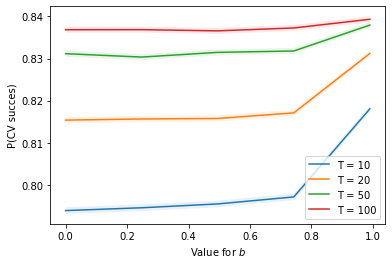

In [583]:
plt.xlabel(r"Value for $b$")
print(np.shape(total_list))
plt.ylabel(r"P(CV succes)")
for i, b_list in enumerate(total_list):
    plt.plot(b_range, b_list, label = f"T = {round(T_range[i], 2)}")
    plt.legend()
    
    dev = 1.96 * np.sqrt(np.array(b_list) * (1 - np.array(b_list)) / iters)
    plt.fill_between(b_range, b_list - dev, b_list + dev, alpha = 0.1)
print(b_list)

### As a function of $a$, fixed $T$

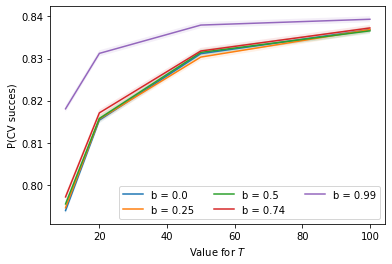

In [582]:
plt.xlabel(r"Value for $T$")
plt.ylabel(r"P(CV succes)")
for i, T_list in enumerate(np.array(total_list).T):
    T_list = np.array(T_list)
    plt.plot(T_range[:-1], T_list, label = f"b = {round(b_range[i], 2)}")
    plt.legend(ncol = 3)
    
    dev = 1.96 * np.sqrt(T_list * (1 - T_list) / iters)
    plt.fill_between(T_range[:-1], np.array(T_list) - dev, T_list + dev, alpha = 0.1)

In [116]:
# cross validation
# train with only a and check emprirical risk
features = X_comb.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
    features_test, labels_test = features[:, i], labels[i]
    
    # train on del set
    coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del
    
    # test on test set
    cv_scores.append(((labels_test - features_test @ coefs) ** 2))

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 99)

In [115]:
# cross validation
# train with only a and check emprirical risk
features = X_1.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i), np.delete(labels, i)
    features_test, labels_test = features[i], labels[i]
    
    # train on del set
    coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del
    
    # test on test set
    cv_scores.append((labels_test - features_test * coefs) ** 2)

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 1.0918.


In [114]:
# cross validation
# train with only b and check emprirical risk
features = X_2.copy()
labels = Y.copy()
cv_scores = []

# for each sample
for i in range(T):
    # split data
    features_del, labels_del = np.delete(features, i), np.delete(labels, i)
    features_test, labels_test = features[i], labels[i]
    
    # train on del set
    coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del
    
    # train on test set
    cv_scores.append((labels_test - features_test * coefs) ** 2)

# report mean
print(f"CV-MSE^2: {round(np.mean(np.array(cv_scores)), 4)}.")

CV-MSE^2: 4.0356.


In [7]:
def compute_bias(features, labels):
    
    T = np.shape(labels)[0]
    bias = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i), np.delete(labels, i)
        features_test, labels_test = features[i], labels[i]

        # train on del set
        coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del

        # train on test set
        ## full random variable
        bias.append(coefs * features_test * (2 * labels_test - coefs * features_test))
        
        ## part of random variable with non-zero mean
        # bias.append(-(coefs * features_test) ** 2)
        
        ## second part of second moment decomposition
        # bias.append(coefs * features_test)
    
    return np.mean(bias)

def cv_1d(features, labels):
    
    T = np.shape(labels)[0]
    cv_scores = []
    cv_scores_2 = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i), np.delete(labels, i)
        features_test, labels_test = features[i], labels[i]

        # train on del set
        coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del

        # train on test set
        cv_scores.append((labels_test - features_test * coefs) ** 2)
        res = labels_test
        cv_scores_2.append(coefs * features_test * (2 * res - coefs * features_test))
        
    
    return np.mean(np.array(cv_scores)), np.mean(np.array(cv_scores_2))

def cv_nd(features, labels):
    
    T = np.shape(labels)[0]
    cv_scores = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
        features_test, labels_test = features[:, i], labels[i]

        # train on del set
        coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del

        # test on test set
        cv_scores.append(((labels_test - features_test @ coefs) ** 2))

    return np.mean(np.array(cv_scores))

coefs = np.linalg.inv(X_comb @ X_comb.T) @ X_comb @ Y
a_est = 1 / (np.dot(X_1, X_1.T)) * X_1 @ Y
b_est = 1 / (np.dot(X_2, X_2.T)) * X_2 @ Y

print(f"CV Using X1:\t\t{round(cv_1d(X_1, Y)[0], 4)}. MSE on X1:\t{1 / T * np.linalg.norm(Y - a_est * X_1, 2) ** 2}")
print(f"CV Using X2:\t\t{round(cv_1d(X_2, Y)[0], 4)}. MSE on X2:\t{1 / T * np.linalg.norm(Y - b_est * X_2, 2) ** 2}")
print(f"CV using X1 and X2:\t{round(cv_nd(X_comb, Y), 4)}. MSE on X1 + X2:\t{1 / T * np.linalg.norm(Y - coefs @ X_comb, 2) ** 2}")

CV Using X1:		1.0929. MSE on X1:	1.075452210050462
CV Using X2:		3.491. MSE on X2:	3.4200358025627757
CV using X1 and X2:	1.1107. MSE on X1 + X2:	1.071161126159431


In [192]:
X_1, X_2 = gen_ar1(a, T), gen_ar1(b, T)
Y = X_1 + np.random.normal(0, 1, T)
Y2 = Y - X_1

print(cv_1d(X_2, Y2)[1])
cv_ar2 = cv_1d(X_2, Y2)[0]
cv_ar1 = 1 / T * np.linalg.norm(Y2, 2) ** 2
print(cv_ar1 - cv_ar2)
compute_bias(X_2, Y2)

-0.014110405614425545
-0.014110405614425447


-0.014110405614425545

In [394]:
def MSE_1d(X, Y):
    coefs = 1 / (X @ X.T) * X @ Y
    return 1 / np.shape(Y)[0] * np.linalg.norm(Y - X * coefs, 2) ** 2

def MSE_nd(X, Y):
    coefs = np.linalg.inv(X @ X.T) @ X @ Y
    return 1 / np.shape(Y)[0] * np.linalg.norm(Y - coefs @ X, 2) ** 2

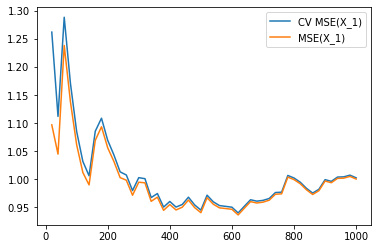

In [408]:
a, b, s = 0.5, 0.5, 1
T = 1000

X_1 = gen_ar1(a, T)
X_2 = gen_ar1(b, T)

Y = X_1 + np.random.normal(0, s, T)

cv_1 = []
cv_2 = []
cv_12 = []

mse_1 = []
mse_2 = []
mse_12 = []

for t in range(20, T + 1, 20):
    X_1t, X_2t, Y_t = X_1[:t], X_2[:t], Y[:t]
    X_comb = np.vstack((X_1t, X_2t))
    
    cv_1.append(cv_1d(X_1t, Y_t))
    cv_2.append(cv_1d(X_2t, Y_t))
    cv_12.append(cv_nd(X_comb, Y_t))
    
    mse_1.append(MSE_1d(X_1t, Y_t))
    mse_2.append(MSE_1d(X_2t, Y_t))
    mse_12.append(MSE_nd(X_comb, Y_t))
    
plt.plot(range(20, T + 1, 20), cv_1, label = "CV MSE(X_1)")
plt.plot(range(20, T + 1, 20), mse_1, label = "MSE(X_1)")
# plt.plot(range(20, T + 1, 20), cv_2, label = "MSE(X_2)")
# plt.plot(range(20, T + 1, 20), mse_12, label = "MSE(X_1, X_2)")
# plt.plot(range(20, T + 1, 20), cv_12, label = "CV MSE(X_1, X_2)")
plt.legend()

We have a closed form solution of $$R(\hat{f}_T).$$ What is $$CV(\mathcal{F})?$$

$$CV(\mathcal{F}) = \frac{1}{T} \sum_{i = 1}^T \left(Y_i - X_i \hat{w}_{-i}\right)^2,$$ where $$\hat{w}_{-i} = (X_{-i} X_{-i}^T)^{-1} X_{-i} Y_{-i}.$$

$$X_t = aX_{t-1}$$